*Mohammad Taher Pilehvar, Iran University of Science and Technology* - Based on a Keras tutorial by François Chollet

# Sentiment Analysis: IMDB movie reviews


Given a sentence, the task in sentiment analysis is to classify it as *positive* or *negative* (sometimes also *neutral*), depending on the attitude of the writer. For instance, a sentiment analysis system would automatically detect if a buyer's review for a product in digikala.com is telling something good or bad about it.

The IMDB dataset is one of the first standard datasets for sentiment analysis. The dataset contains 50,000 highly polarized movie reviews (25K training, 25K test, each 50-50%).

IMDB comes preloaded with Keras. Let's load imdb data:

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = 
imdb.load_data(num_words=10000)


A text is represented as a sequence of integers. Each number stands for a word (index of the word in the dictionary).

In [ ]:
print(train_data[0])

`train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [ ]:
print(train_labels[0])

In [ ]:
print(max([max(sequence) for sequence in train_data]))

Checking one review:

In [21]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for 
                           (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') 
                           for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

In [16]:
print('label',train_labels[0:10])

('label', array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0]))


First, we need to convert the list of integers to tensors, so that we can use them as input to the network. We have two options:
* One-hot encoding
* Embedding layer

### Preparing data with one-hot encoding

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[0])

[ 0.  1.  1. ...,  0.  0.  0.]


You should also vectorize your labels, which is straightforward:

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

The input data is vectors, and the labels are scalars (1s and 0s)

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s - loss: 0.5157 - acc: 0.7895 - val_loss: 0.4009 - val_acc: 0.8653
Epoch 2/20
15000/15000 [==============================] - 2s - loss: 0.3146 - acc: 0.9029 - val_loss: 0.3247 - val_acc: 0.8787
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.2319 - acc: 0.9246 - val_loss: 0.2808 - val_acc: 0.8923
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.1816 - acc: 0.9430 - val_loss: 0.2729 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.1495 - acc: 0.9513 - val_loss: 0.2780 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.1209 - acc: 0.9631 - val_loss: 0.3222 - val_acc: 0.8805
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 0.1031 - acc: 0.9692 - val_loss: 0.3045 - val_acc: 0.8850
Epoch 8/20
15000/15000 [==============================] - 2s 

`model.fit()` returns a History object

In [11]:
history_dict = history.history
print(history_dict.keys())

['acc', 'loss', 'val_acc', 'val_loss']


Plot the training and validation loss:

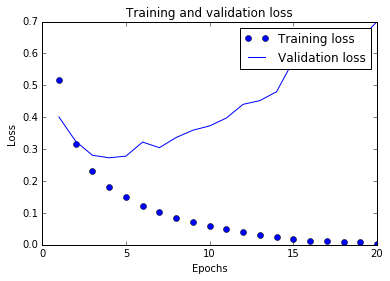

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Plot the training and validation accuracy

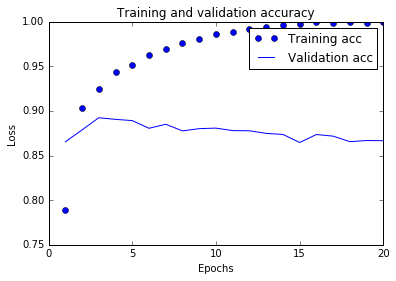

In [13]:
plt.clf()
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We are **overfitting**!

Further experiments:
* Try using one or three hidden layers
* Try using layers with more hidden units or fewer hidden units
* Try using the `mse` loss function instead of `binary_crossentropy`
* Try using the `tanh` activation instead of `relu`
